<H1>Módulo 13: Series Temporales y Análisis de Regresión</H1>


- **Conceptos clave**:
  - Aplicación de técnicas de regresión para modelar series temporales.
  - Modelos de regresión con componentes de series temporales (Regresión ARIMA, Regresión Dinámica).
  - Evaluación de la relación entre series temporales y variables predictoras.
- **Proyecto**: Implementar un modelo de regresión para series temporales.
  - Usar técnicas de regresión para modelar una serie temporal y evaluar el impacto de variables externas en la serie temporal.

<H1>Marco teórico</H1>

#### 1. Series Temporales

Las **series temporales** son secuencias de datos medidos en intervalos de tiempo sucesivos. Su análisis permite identificar patrones, tendencias, y ciclos que pueden ser utilizados para realizar pronósticos.

##### 1.1 Componentes de una Serie Temporal

- **Tendencia $T_t$**: Refleja el comportamiento a largo plazo de la serie, es decir, el movimiento ascendente o descendente que se mantiene a lo largo del tiempo.
  
- **Estacionalidad $S_t$**: Representa las variaciones periódicas que ocurren en intervalos regulares. Por ejemplo, las ventas pueden aumentar durante las festividades.

- **Ciclos**: Fluctuaciones que ocurren a intervalos irregulares debido a factores económicos u otros eventos.

- **Ruido $E_t$**: Variaciones aleatorias que no se pueden atribuir a las otras componentes.

**Ecuación General**:
$
Y_t = T_t + S_t + E_t
$

#### 2. Regresión

La regresión es una técnica estadística que permite modelar y analizar la relación entre variables. La forma más sencilla es la regresión lineal simple, pero existen variaciones para datos más complejos.

##### 2.1 Regresión Lineal Simple

La regresión lineal simple asume que hay una relación lineal entre la variable dependiente $Y$ y la variable independiente $X$.

**Ecuación**:
$
Y = \beta_0 + \beta_1 X + \epsilon
$

Donde:
- $Y$ es el valor que queremos predecir (por ejemplo, el precio de cierre).
- $X$ es la variable independiente (por ejemplo, el volumen de acciones).
- $\beta_0$ es la intersección en el eje $Y$.
- $\beta_1$ es la pendiente de la recta.
- $\epsilon$ es el término de error que captura la variabilidad no explicada.

##### 2.2 Regresión Múltiple

Cuando se incluyen múltiples variables independientes, se utiliza la regresión múltiple:

**Ecuación**:
$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon
$

Esto permite evaluar el efecto combinado de varias variables predictoras en la variable dependiente.

#### 3. Regresión en Series Temporales

##### 3.1 Modelo ARIMA

El modelo ARIMA combina tres componentes: autorregresivo (AR), media móvil (MA) e integración (I). Es útil para series temporales que no son estacionarias.

**Componentes**:
- **AR (Autorregresivo)**: Relación de la variable consigo misma en periodos pasados.
- **I (Integrado)**: Diferenciación de la serie para hacerla estacionaria.
- **MA (Media Móvil)**: Relación de la variable con los errores de predicción en periodos anteriores.

**Ecuación ARIMA**:
$
Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t
$

Donde:
- $\phi$ son los parámetros autorregresivos.
- $\theta$ son los parámetros de la media móvil.

##### 3.2 Regresión Dinámica

La regresión dinámica es útil cuando la variable dependiente depende de sus propios valores pasados y de variables independientes.

**Ecuación**:
$
Y_t = \beta_0 + \beta_1 X_t + \beta_2 Y_{t-1} + \epsilon_t
$

Esto permite que el modelo se ajuste a las dependencias temporales entre las observaciones.

#### 4. Evaluación del Modelo

La evaluación de un modelo es crucial para determinar su efectividad. Se utilizan diversas métricas:

##### 4.1 Error Cuadrático Medio (MSE)

El MSE mide la media de los errores al cuadrado y se usa para comparar la precisión de los modelos.

**Ecuación**:
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

Donde:
- $y_i$ son los valores reales.
- $\hat{y}_i$ son los valores predichos.
- $n$ es el número total de observaciones.

##### 4.2 Coeficiente de Determinación (R²)

El R² indica qué proporción de la variabilidad de la variable dependiente se explica por las variables independientes.

**Ecuación**:
$
R^2 = 1 - \frac{\text{SS}_{residual}}{\text{SS}_{total}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$

Donde $\bar{y}$ es la media de los valores observados.

##### 4.3 Diagnóstico de Residuos

Es fundamental verificar los residuos del modelo (diferencias entre valores observados y predicciones) para asegurar que son independientes y están distribuidos normalmente.

#### 5. Conclusiones

Este marco teórico proporciona un entendimiento sólido sobre el análisis de series temporales y técnicas de regresión. Permite a los analistas hacer predicciones informadas sobre futuros comportamientos de las variables en estudio. Además, es fundamental aplicar validaciones adecuadas y pruebas de diagnóstico para asegurar la validez del modelo.

<H1>Proyecto</H1>

**Importar las bibliotecas necesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Importar datos de series temporales**

Para este ejemplo, usaremos los precios de cierre de las acciones de una empresa (por ejemplo, Apple) y algunas variables externas, como el volumen de acciones.

In [2]:
# Importar datos de precios de acciones de Apple
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
data.reset_index(inplace=True)

# Visualizar los datos
print(data.head())

[*********************100%***********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close     Volume
0 2018-01-02  42.540001  43.075001  42.314999  43.064999  40.568928  102223600
1 2018-01-03  43.132500  43.637501  42.990002  43.057499  40.561871  118071600
2 2018-01-04  43.134998  43.367500  43.020000  43.257500  40.750267   89738400
3 2018-01-05  43.360001  43.842499  43.262501  43.750000  41.214226   94640000
4 2018-01-08  43.587502  43.902500  43.482498  43.587502  41.061146   82271200


**Preparar los datos**

Vamos a preparar los datos para el análisis. Usaremos el precio de cierre y el volumen de acciones.

In [3]:
# Seleccionar columnas relevantes
df = data[['Date', 'Close', 'Volume']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

/tmp/ipykernel_12448/1322266628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


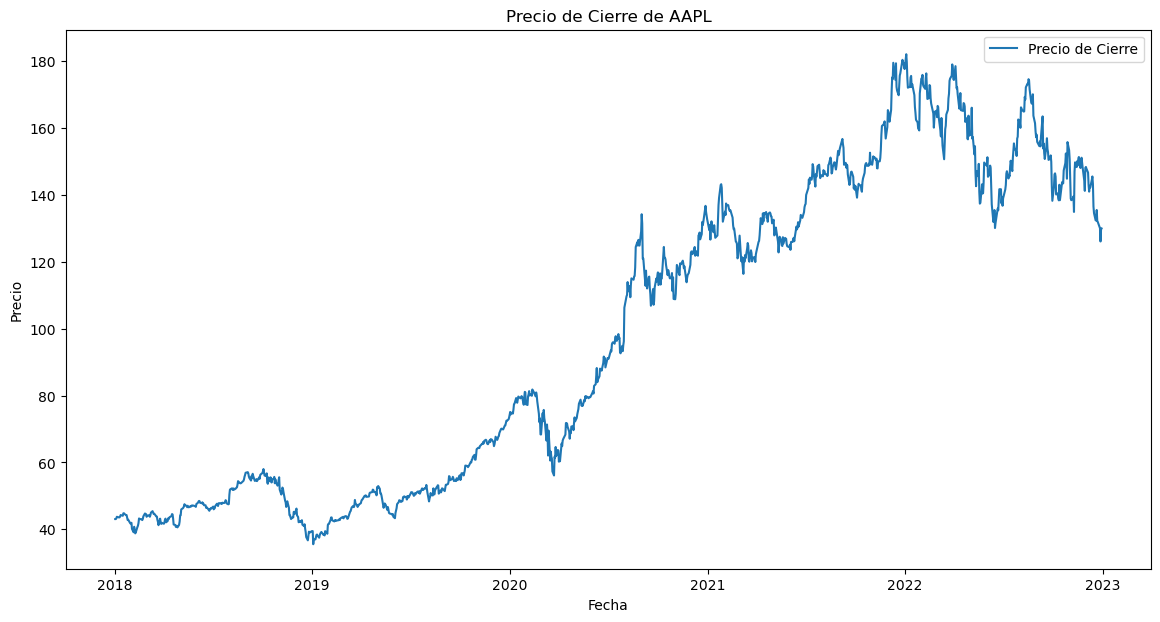

In [5]:
# Visualizar la serie temporal
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

**Análisis exploratorio de datos (EDA)**
Analizamos la relación entre el precio de cierre y el volumen.

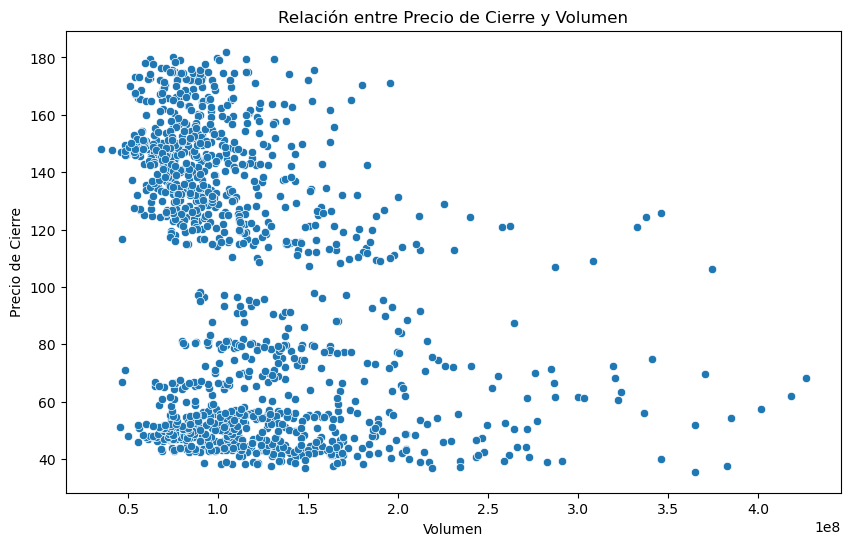

In [6]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Relación entre Precio de Cierre y Volumen')
plt.xlabel('Volumen')
plt.ylabel('Precio de Cierre')
plt.show()

**Crear el modelo de regresión**

Dividimos los datos en conjuntos de entrenamiento y prueba, y ajustamos un modelo de regresión lineal.

In [7]:
# Definir variables predictoras y respuesta
X = df['Volume'].values.reshape(-1, 1)  # Variable predictora
y = df['Close'].values  # Variable respuesta

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [8]:
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           4.01e-27
Time:                        11:30:00   Log-Likelihood:                -5234.0
No. Observations:                1007   AIC:                         1.047e+04
Df Residuals:                    1005   BIC:                         1.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.1586      3.225     40.672      0.0

**Evaluación del modelo**

Evaluamos el modelo utilizando el conjunto de prueba.

In [9]:
# Hacer predicciones
y_pred = model.predict(sm.add_constant(X_test))

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 1853.349936640915
R²: 0.11988936851576759


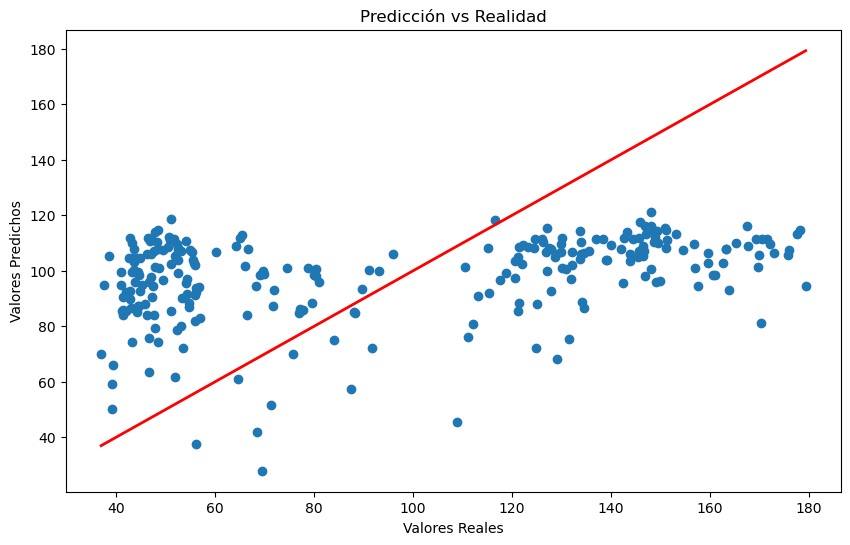

In [11]:
# Gráfico de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Predicción vs Realidad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()